# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I chose British Airways espe...
1,Not Verified | I booked Premium Economy from I...
2,✅ Trip Verified | A simple story with an unfor...
3,✅ Trip Verified | Flight was delayed due to t...
4,Not Verified | Fast and friendly check in (to...


In [10]:
df.to_csv("data.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [30]:
review = pd.read_csv("data.csv")
review = review.pop('reviews')
review

0      ✅ Trip Verified | I chose British Airways espe...
1      Not Verified | I booked Premium Economy from I...
2      ✅ Trip Verified | A simple story with an unfor...
3      ✅ Trip Verified |  Flight was delayed due to t...
4      Not Verified |  Fast and friendly check in (to...
                             ...                        
995    ✅ Trip Verified |  Chicago to London. I have f...
996    ✅ Trip Verified |  Berlin to London. It was a ...
997    ✅ Trip Verified |  British Airways is my favor...
998    ✅ Trip Verified |  Rome to Newark via London. ...
999    ✅ Trip Verified |  London Heathrow to New York...
Name: reviews, Length: 1000, dtype: object

In [31]:
review

0      ✅ Trip Verified | I chose British Airways espe...
1      Not Verified | I booked Premium Economy from I...
2      ✅ Trip Verified | A simple story with an unfor...
3      ✅ Trip Verified |  Flight was delayed due to t...
4      Not Verified |  Fast and friendly check in (to...
                             ...                        
995    ✅ Trip Verified |  Chicago to London. I have f...
996    ✅ Trip Verified |  Berlin to London. It was a ...
997    ✅ Trip Verified |  British Airways is my favor...
998    ✅ Trip Verified |  Rome to Newark via London. ...
999    ✅ Trip Verified |  London Heathrow to New York...
Name: reviews, Length: 1000, dtype: object

In [32]:
review

0      ✅ Trip Verified | I chose British Airways espe...
1      Not Verified | I booked Premium Economy from I...
2      ✅ Trip Verified | A simple story with an unfor...
3      ✅ Trip Verified |  Flight was delayed due to t...
4      Not Verified |  Fast and friendly check in (to...
                             ...                        
995    ✅ Trip Verified |  Chicago to London. I have f...
996    ✅ Trip Verified |  Berlin to London. It was a ...
997    ✅ Trip Verified |  British Airways is my favor...
998    ✅ Trip Verified |  Rome to Newark via London. ...
999    ✅ Trip Verified |  London Heathrow to New York...
Name: reviews, Length: 1000, dtype: object

In [38]:
import seaborn as sns
import matplotlib as plt
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

review = review.str.replace('Trip Verified |', '')
review = review.str.replace('✅', '')
review = review.str.replace('|', '')
review = review.str.replace(r'\b(\w{1,3})\b', '')
review = review.apply(remove_punctuation)
review

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15560\3216176097.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  review = review.str.replace('Trip Verified |', '')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15560\3216176097.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  review = review.str.replace('|', '')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15560\3216176097.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  review = review.str.replace(r'\b(\w{1,3})\b', '')


0         chose British Airways especially because   ...
1       Verified   booked Premium Economy from      T...
2         simple story with  unfortunate outcome that...
3         Flight  delayed    inbound flight arriving ...
4       Verified   Fast  friendly check  total contra...
                             ...                        
995       Chicago  London  have flown long haul many ...
996       Berlin  London    connecting flight   shoul...
997       British Airways   favorite airline Boeing  ...
998       Rome  Newark  London  first sector    A319 ...
999       London Heathrow   York   First Wing  Termin...
Name: reviews, Length: 1000, dtype: object

In [39]:
review.shape

(1000,)

In [40]:
freq_word = pd.Series(' '.join(review).lower().split()).value_counts()[:50]
freq_word

flight      1851
with        1375
that        1159
they        1107
were        1009
this         903
have         852
service      709
from         704
london       590
very         589
seat         505
time         477
there        467
food         461
crew         452
good         417
seats        416
which        405
staff        396
class        396
british      395
when         391
airways      387
their        387
cabin        382
would        374
business     363
after        361
check        350
only         344
’            318
hours        313
been         305
heathrow     304
them         297
back         280
economy      276
then         275
could        273
just         269
customer     267
airline      261
flights      253
first        251
boarding     250
more         250
told         248
about        242
again        241
dtype: int64

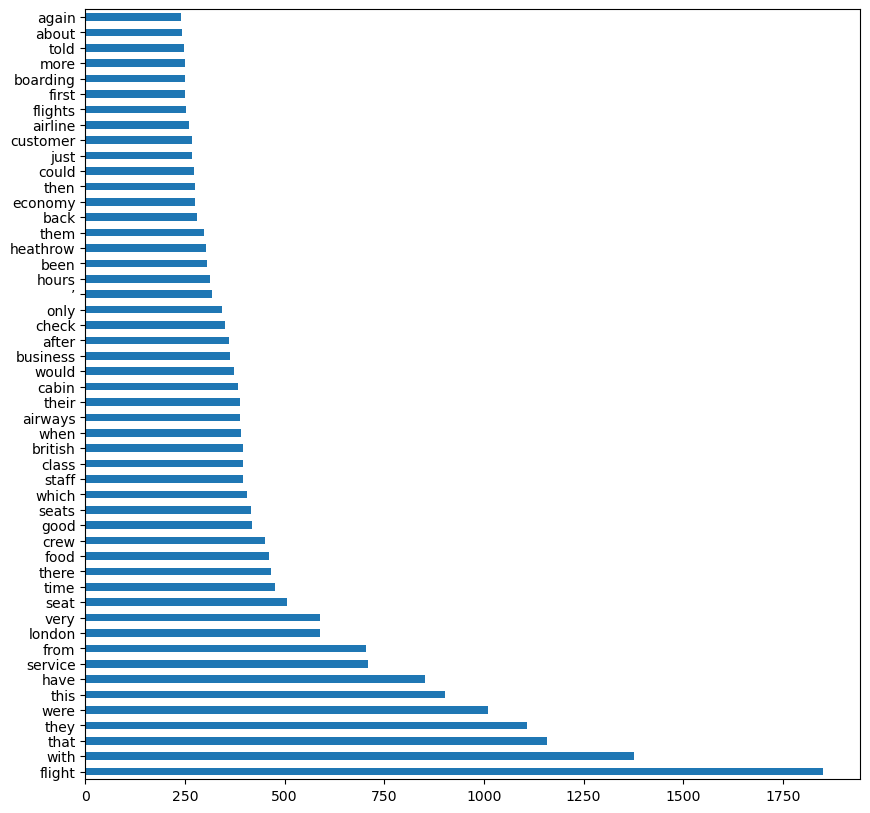

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
freq_word.plot.barh(freq_word[0], freq_word[1])
plt.show()

In [51]:
#TEXT CLUSTERING
categories = ['negative','positive']
num_cat = len(categories)
num_cat

2

In [52]:
#TF_IDF feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [53]:
#Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

#Vectorize document
tf_idf_vect = TfidfVectorizer(lowercase=True, stop_words = 'english', ngram_range = (1,1), tokenizer = tokenizer.tokenize)


#fit and transfor text data
reviews_count = tf_idf_vect.fit_transform(review)

reviews_count.shape


(1000, 6773)

In [54]:
#Import and create K-means cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_cat).fit(reviews_count)

In [55]:
pred_labels = kmeans.labels_
pred_labels

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,

In [59]:
cluster_centres = kmeans.cluster_centers_
cluster_centres

array([[0.        , 0.        , 0.00019458, ..., 0.00168665, 0.        ,
        0.        ],
       [0.00042606, 0.0004852 , 0.        , ..., 0.00129825, 0.00024255,
        0.00024255]])

In [61]:
import numpy as np
unique, counts = np.unique(pred_labels, return_counts = True)
dict(zip(unique,counts))

{0: 631, 1: 369}

In [66]:
from sklearn import metrics

#Compute DBI score
dbi = metrics.davies_bouldin_score(reviews_count.toarray(), pred_labels)

#Silhoutte Score
ss = metrics.silhouette_score(reviews_count.toarray(),pred_labels,metric='euclidean')

print("DBI score: " ,dbi,"Silhoutte Score: ",ss)

DBI score:  10.035136163009929 Silhoutte Score:  0.008646885512023838


In [68]:
df_reviews = pd.DataFrame({'review': reviews, 'label': pred_labels})
df_reviews

,review,label
0,✅ Trip Verified | I chose British Airways espe...,1
1,Not Verified | I booked Premium Economy from I...,1
2,✅ Trip Verified | A simple story with an unfor...,1
3,✅ Trip Verified | Flight was delayed due to t...,1
4,Not Verified | Fast and friendly check in (to...,0
...,...,...
995,✅ Trip Verified | Chicago to London. I have f...,0
996,✅ Trip Verified | Berlin to London. It was a ...,1
997,✅ Trip Verified | British Airways is my favor...,0
998,✅ Trip Verified | Rome to Newark via London. ...,0


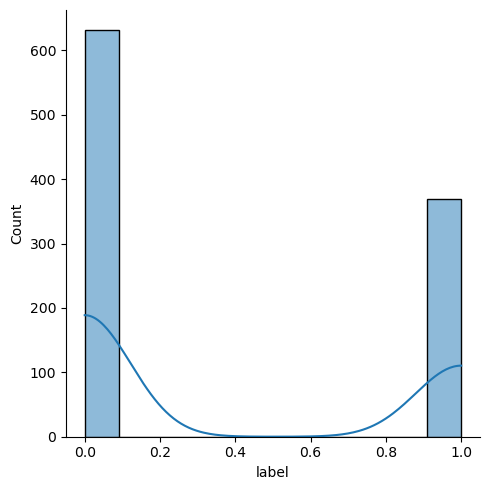

In [69]:
sns.displot(df_reviews['label'], kde = True)


In [71]:
positive_review = df_reviews[df_reviews['label']==1]
positive_review

,review,label
0,✅ Trip Verified | I chose British Airways espe...,1
1,Not Verified | I booked Premium Economy from I...,1
2,✅ Trip Verified | A simple story with an unfor...,1
3,✅ Trip Verified | Flight was delayed due to t...,1
7,✅ Trip Verified | Customer Service does not e...,1
...,...,...
985,Not Verified | Calgary to Rome via London. My...,1
989,Not Verified | Dublin to London. I was trying ...,1
991,✅ Trip Verified | I was in Prague flying Brit...,1
993,✅ Trip Verified | We flew from Los Angeles to ...,1


In [72]:
negative_review = df_reviews[df_reviews['label']==0]
negative_review

,review,label
4,Not Verified | Fast and friendly check in (to...,0
5,✅ Trip Verified | I don't understand why Brit...,0
6,Not Verified | I'm sure that BA have graduall...,0
8,✅ Trip Verified | Another really great pair of...,0
10,Not Verified | Horrible airline. Does not care...,0
...,...,...
994,✅ Trip Verified | Brindisi to London. Flying ...,0
995,✅ Trip Verified | Chicago to London. I have f...,0
997,✅ Trip Verified | British Airways is my favor...,0
998,✅ Trip Verified | Rome to Newark via London. ...,0
